In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [4]:
glass_df = pd.read_csv("glass_id_database.csv")
glass_df.sample(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
189,190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
53,54,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
46,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
106,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
78,79,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2
63,64,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.00,0.00,1
170,171,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
195,196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7
23,24,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00,1


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [5]:
glass_df.isnull().values.any()

False

##No missing values as we got False as output in the above statement execution

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


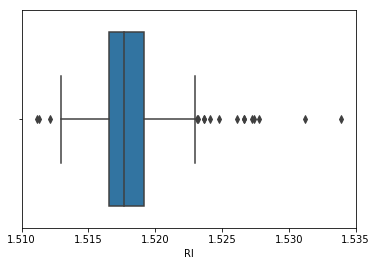

In [6]:
sns.boxplot(glass_df['RI'])

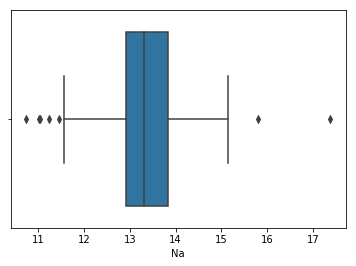

In [7]:
sns.boxplot(glass_df['Na'])

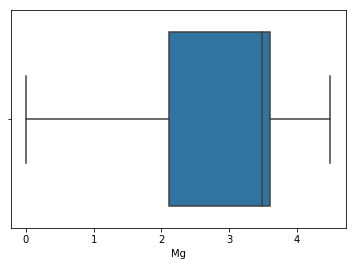

In [8]:
sns.boxplot(glass_df['Mg'])

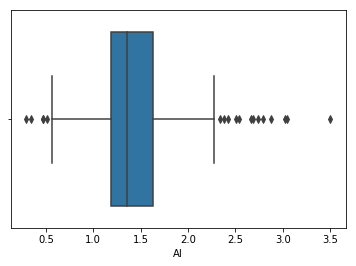

In [9]:
sns.boxplot(glass_df['Al'])

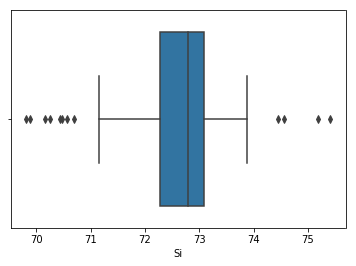

In [10]:
sns.boxplot(glass_df['Si'])

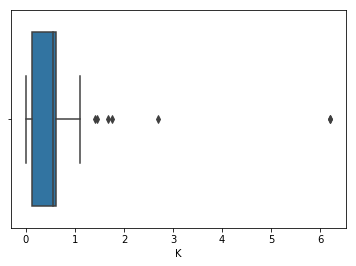

In [11]:
sns.boxplot(glass_df['K'])

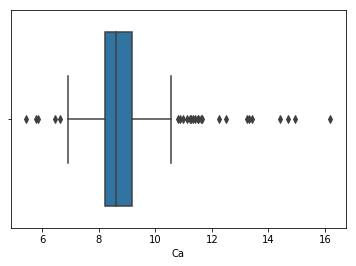

In [12]:
sns.boxplot(glass_df['Ca'])

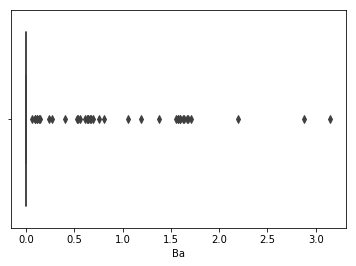

In [13]:
sns.boxplot(glass_df['Ba'])

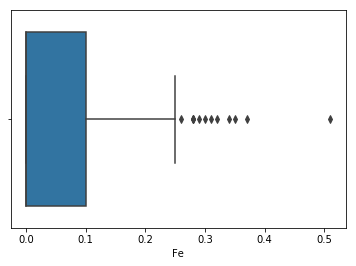

In [14]:
sns.boxplot(glass_df['Fe'])

##In most of the independent features' boxplot showing some outliers above

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [15]:
var_data = glass_df.iloc[:,1:-1].var()
var_data

RI    0.000009
Na    0.666841
Mg    2.080540
Al    0.249270
Si    0.599921
K     0.425354
Ca    2.025366
Ba    0.247227
Fe    0.009494
dtype: float64

In [18]:
removable_variables = []
for i in var_data.index:
    if var_data[i] <0.1:
        removable_variables.append(i)
print("removable_variables:{}".format(removable_variables))
cols = list(set(var_data.index) - set(removable_variables))
cols.insert(0,'Id number')
cols.append('Type of glass')
glass_df_filtered = glass_df[cols]
glass_df_filtered

removable_variables:['RI', 'Fe']


,Id number,Al,Ca,Na,Si,Ba,K,Mg,Type of glass
0,1,1.10,8.75,13.64,71.78,0.00,0.06,4.49,1
1,2,1.36,7.83,13.89,72.73,0.00,0.48,3.60,1
2,3,1.54,7.78,13.53,72.99,0.00,0.39,3.55,1
3,4,1.29,8.22,13.21,72.61,0.00,0.57,3.69,1
4,5,1.24,8.07,13.27,73.08,0.00,0.55,3.62,1
5,6,1.62,8.07,12.79,72.97,0.00,0.64,3.61,1
6,7,1.14,8.17,13.30,73.09,0.00,0.58,3.60,1
7,8,1.05,8.24,13.15,73.24,0.00,0.57,3.61,1
8,9,1.37,8.30,14.04,72.08,0.00,0.56,3.58,1
9,10,1.36,8.40,13.00,72.99,0.00,0.57,3.60,1


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

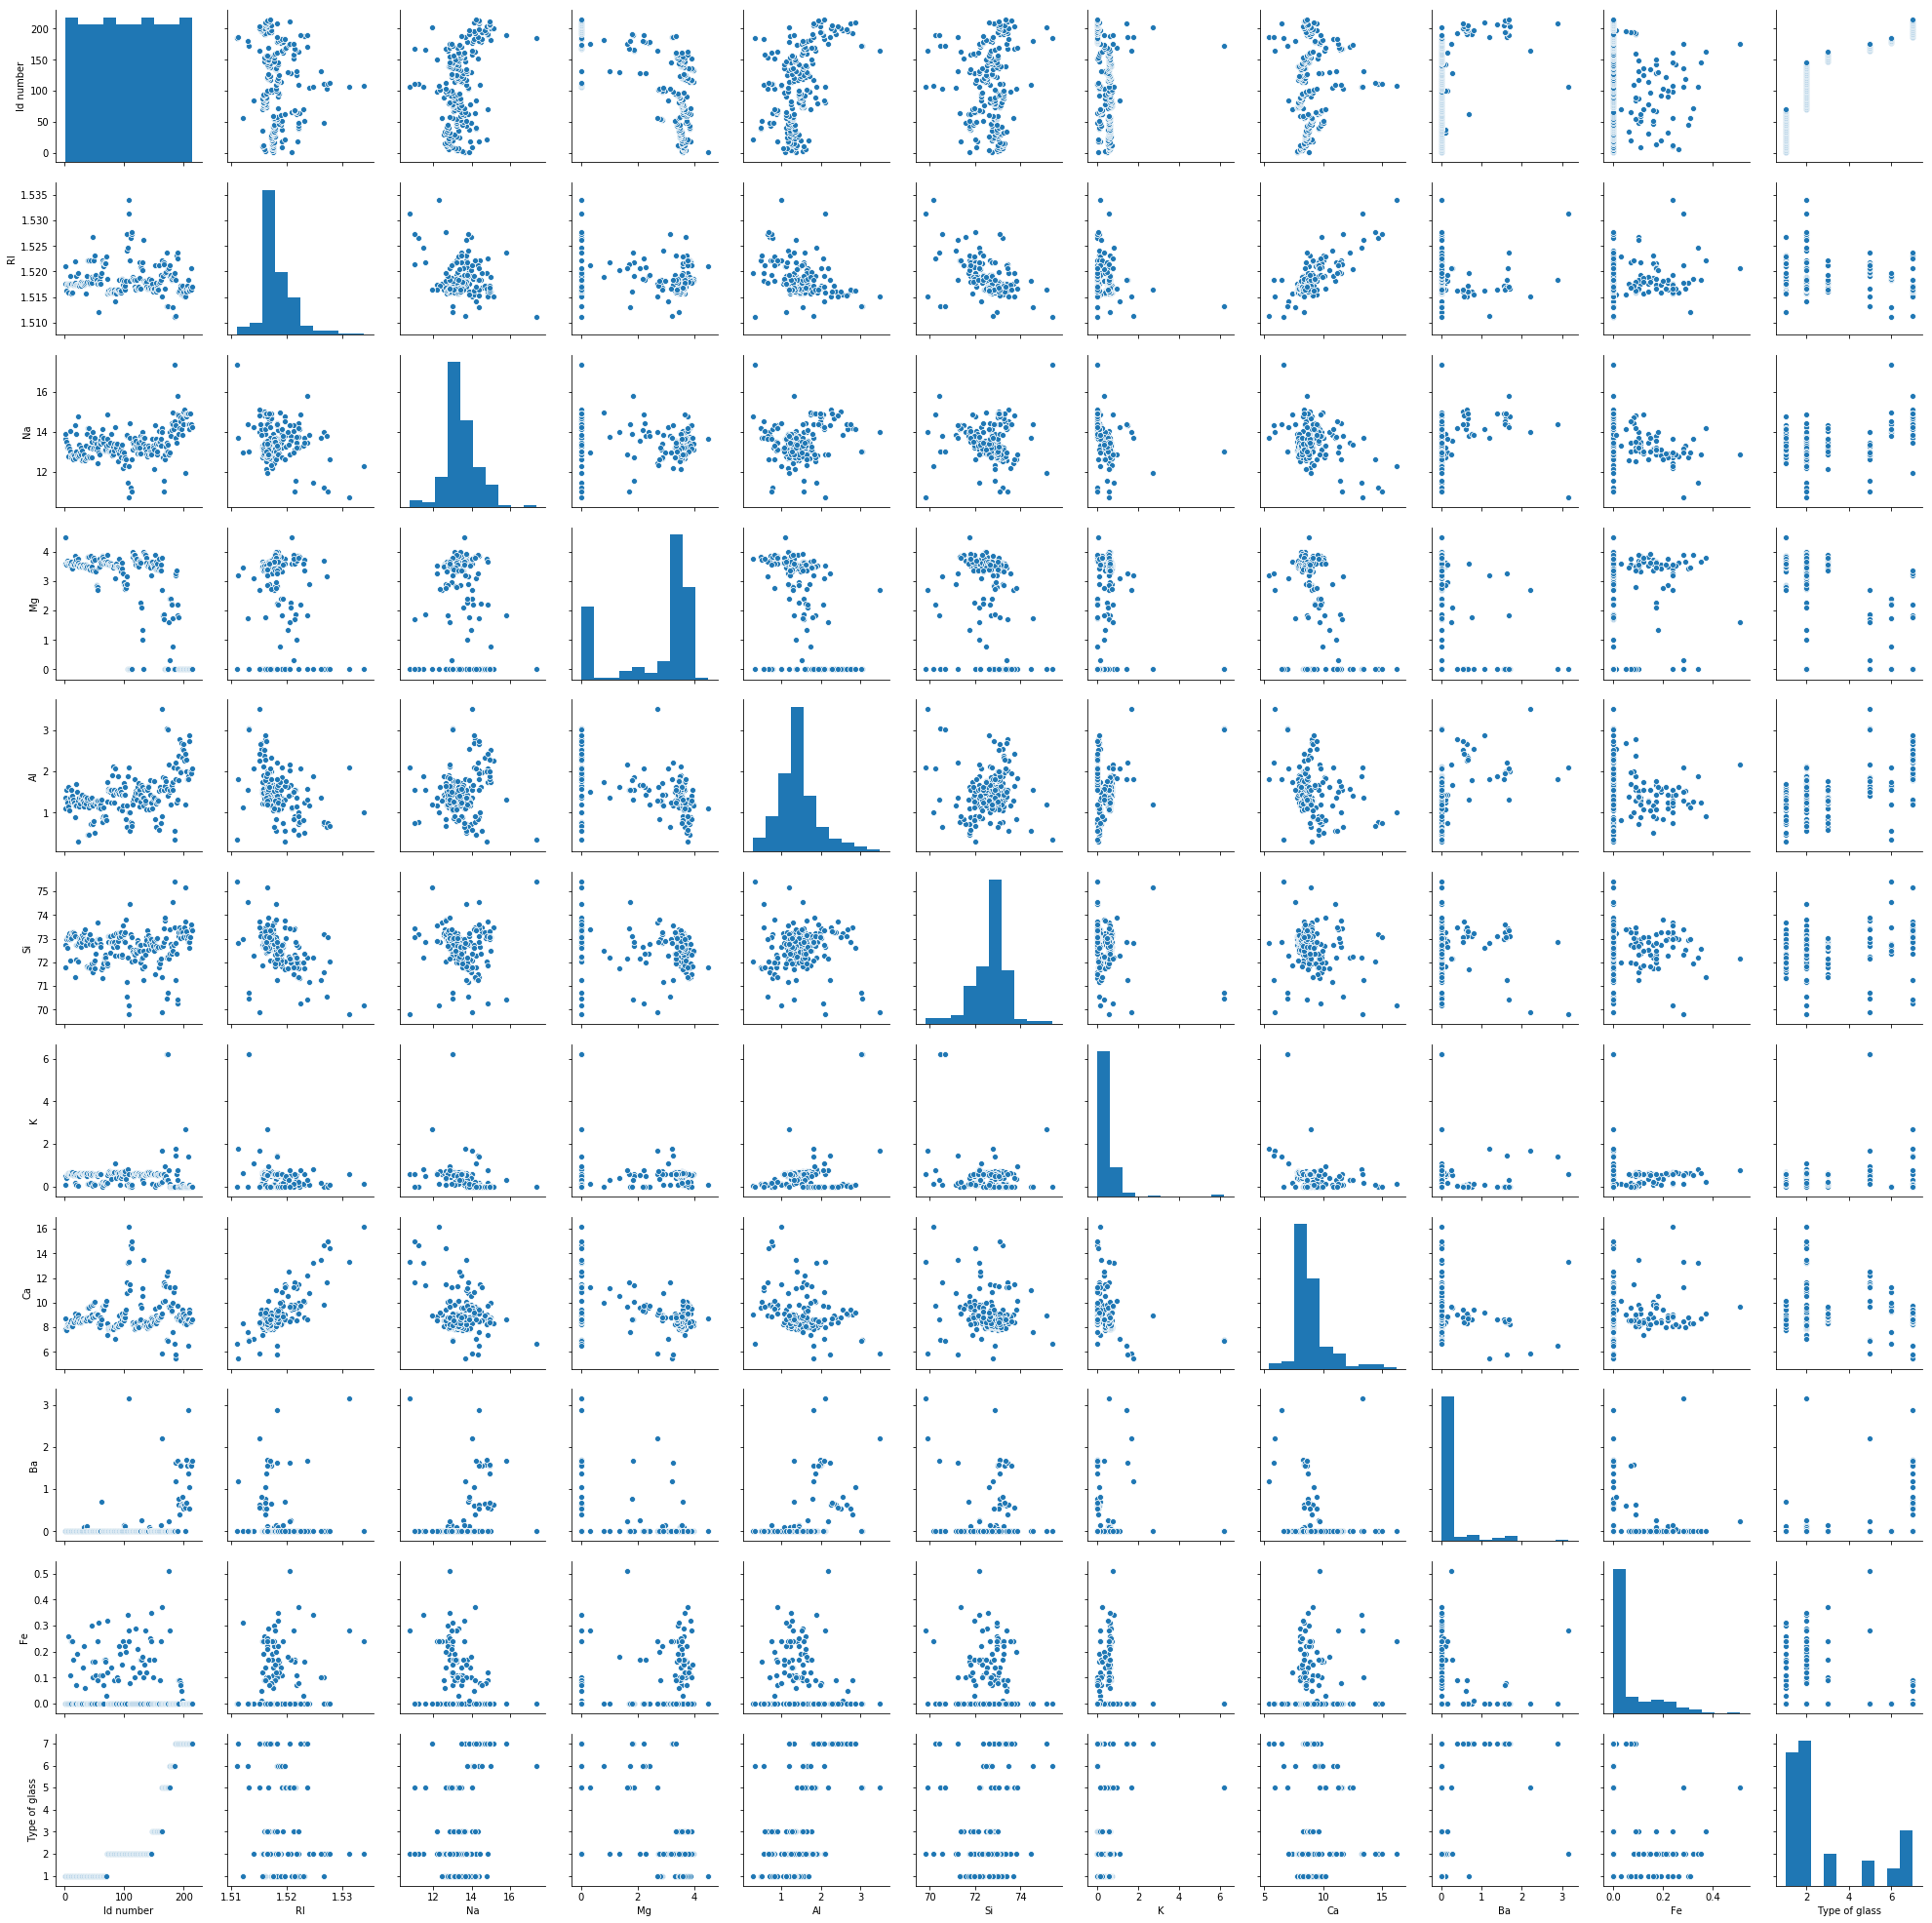

In [19]:
sns.pairplot(glass_df)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [21]:
glass_df_features = glass_df_filtered.drop(labels= ['Id number','Type of glass'] , axis = 1)
glass_df_features.head()

,Al,Ca,Na,Si,Ba,K,Mg
0,1.10,8.75,13.64,71.78,0.0,0.06,4.49
1,1.36,7.83,13.89,72.73,0.0,0.48,3.60
2,1.54,7.78,13.53,72.99,0.0,0.39,3.55
3,1.29,8.22,13.21,72.61,0.0,0.57,3.69
4,1.24,8.07,13.27,73.08,0.0,0.55,3.62


In [23]:
glass_df_lables = glass_df_filtered['Type of glass']
glass_df_lables.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [24]:
x = np.array(glass_df_features)
x.shape

(214, 7)

In [25]:
y = np.array(glass_df_lables)
y.shape

(214,)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)
NNH = KNeighborsClassifier(n_neighbors=3, weights='distance')

NNH.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [27]:
NNH.score(x_test,y_test) # 73% accuracy with k=3

0.7384615384615385

In [28]:
predicted_labels = NNH.predict(x_test)
predicted_labels

array([6, 7, 2, 2, 7, 1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 2, 1, 1, 1, 3, 1, 7,
       2, 1, 1, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 2, 1, 1, 2, 1, 1, 7, 7, 1,
       7, 1, 2, 1, 2, 7, 2, 1, 2, 2, 5, 2, 7, 1, 7, 7, 2, 6, 2, 2, 1],
      dtype=int64)

In [29]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

#print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels, labels=[1,2,3,4,5,6,7]), index=['true:yes', 'true:no'], columns=['pred:yes', 'pred:no']))


[[19  3  2  0  0  1]
 [ 3 16  0  0  2  0]
 [ 5  1  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  9]]


In [30]:
NNH = KNeighborsClassifier(n_neighbors=6, weights='distance')

NNH.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [31]:
NNH.score(x_test,y_test) # 69% accuracy with k=6

0.6923076923076923

In [32]:
NNH = KNeighborsClassifier(n_neighbors=9, weights='distance')

NNH.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [33]:
NNH.score(x_test,y_test) ## 70.7% accuracy with k=9

0.7076923076923077

## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = range(1,20,2)


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

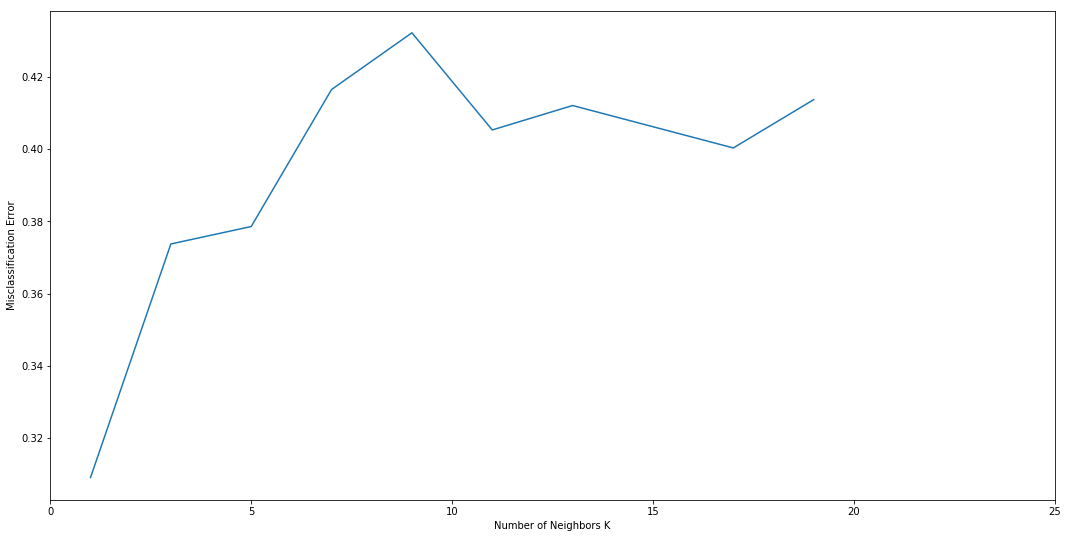

In [35]:
%matplotlib inline 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()